In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Метод пристрелки**

In [ ]:
def f(x, y):
  return np.array([
                   y[1],
                   math.sqrt(-math.exp(y[1])*y[0] + math.e/math.log(x)*y[0]**2 + 1/x**2)
  ])

In [ ]:
a = math.e
b = math.e**2

In [ ]:
ya = math.e
yb = 2*math.e**2
eps = 1e-6

In [ ]:
tau = 0.0002

In [ ]:
def rk_solve(a, b, h, y0):

  n = int(np.ceil((b-a)/h))
  t = np.linspace(a, b, num=n)

  y = np.array([np.zeros(n) for i in range(len(y0))])
  y[:, 0] = y0

  k = np.array([np.zeros(4) for i in range(len(y0))])

  for i in range(n - 1):

    k[:, 0] = f(t[i], y[:, i])
    k[:, 1] = 2 * f(t[i] + h/2, y[:, i] + h/2 * k[:, 0])
    k[:, 2] = 2 * f(t[i] + h/2, y[:, i] + h/2 * k[:, 1])
    k[:, 3] = f(t[i] + h, y[:, i] + h * k[:, 2])

    y[:, i+1] = y[:, i] + 1/6 * h * np.sum(k, axis=1)

  return t, y

In [ ]:
err = lambda y: y - yb

In [ ]:
def optimise(a1, a2):
  t, [y, vy] = rk_solve(a, b, tau, [ya, a1])
  prev1 = err(y[-1])
  t, [y, vy] = rk_solve(a, b, tau, [ya, a2])
  prev2 = err(y[-1])

  a3 = 0
  while (np.abs(err(y[-1]))) > eps:
    a3 = (a1 + a2)/2
    t, [y, vy] = rk_solve(a, b, tau, [ya, a3])
    cur = err(y[-1])
    if cur * prev1 < 0:
      prev2 = cur 
      a2 = a3
    else:
      prev1 = cur 
      a1 = a3

  return t, y, a3

In [ ]:
 a1 = 2.1
 t, [y, vy] = rk_solve(a, b, tau, [ya, a1])
 prev1 = err(y[-1])
 print(prev1)

ValueError: ignored

In [ ]:
 a2 = 0
 t, [y, vy] = rk_solve(a, b, tau, [ya, a2])
 prev2 = err(y[-1])
 print(prev2)

-1.0548951518297436


In [ ]:
x, y, alpha = optimise(a1, a2)
print(alpha)

2.002583084106445


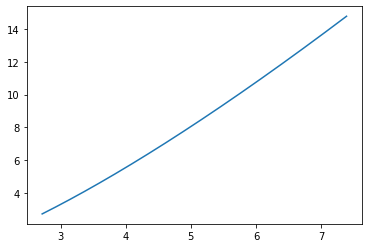

In [ ]:
plt.plot(x, y)

In [ ]:
def find_val(x, y, point):
  dat = {'x': x, 'y': y}
  df = pd.DataFrame(data=dat)

  return df.iloc[(df['x']-point).abs().argsort()[:1]]

In [ ]:
for i in [0.5, 1, 1.5, 2, 2.5]:
  print(find_val(x, y, i))

0.5
          x         y
0  2.718282  2.718282
1
          x         y
0  2.718282  2.718282
1.5
          x         y
0  2.718282  2.718282
2
          x         y
0  2.718282  2.718282
2.5
          x         y
0  2.718282  2.718282
